In [2]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

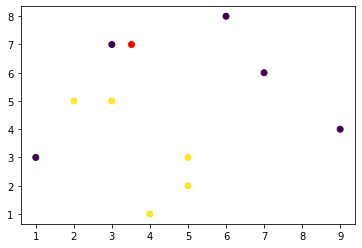

In [4]:
dff = pd.DataFrame({
    'x' : [1,2,3,4,5,6,9,5,3,7],
    'y' : [3,5,7,1,2,8,4,3,5,6],
    'z' : [0,1,0,1,1,0,0,1,1,0]
})
plt.scatter(dff['x'],dff['y'],c=dff['z'])
plt.scatter(3.5,7,color='r')

In [7]:
#(3,8) 94,9)
def ed(x1,x2,z1,z2):
    return np.sqrt((x2-x1)**2+(z2-z1)**2)
ed(3.5,7,3,7)

5.315072906367325

In [8]:
ed(3.5,7,3,5)

4.031128874149275

In [9]:
np.argmin([5.3,4.0])

1

# Customer Purchase

In [10]:
df = pd.read_csv('Social_Network_Ads - Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [12]:
df.drop(columns = 'User ID',inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
lb = LabelEncoder()
sc = StandardScaler()
df['Gender'] = lb.fit_transform(df['Gender'])
df[['Age','EstimatedSalary']] = sc.fit_transform(df[['Age','EstimatedSalary']])

In [15]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0
...,...,...,...,...
395,0,0.797057,-0.844019,1
396,1,1.274623,-1.372587,1
397,0,1.179110,-1.460681,1
398,1,-0.158074,-1.078938,0


In [16]:
ind = df.iloc[:,:3]
dep = df.iloc[:,-1]
dep

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [17]:
ind 

,Gender,Age,EstimatedSalary
0,1,-1.781797,-1.490046
1,1,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,1,-1.781797,0.183751
...,...,...,...
395,0,0.797057,-0.844019
396,1,1.274623,-1.372587
397,0,1.179110,-1.460681
398,1,-0.158074,-1.078938


In [18]:
xx = df.iloc
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.2,random_state=0)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [22]:
testing = pd.DataFrame({
    'y' : y_test,
    'y_hat' : knn.predict(x_test)
})
testing.sample(8)

,y,y_hat
313,1,1
196,0,0
309,0,0
158,0,0
199,0,0
225,0,0
293,0,0
141,0,0


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,knn.predict(x_test))

array([[55,  3],
       [ 3, 19]], dtype=int64)

In [24]:
Accuracy = (55+19)/(55+3+3+19)
Accuracy

0.925